# Plotting with Pandas

Pandas also provides us with a simple interface to Matplotlib, so that we can plot data stored as a Series or Data frame. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Line Plots

We can generate a simple line plot directly from a Pandas Series, by calling the associated *plot()* function. 

First we will load the sample data, which stores monthly products sales across 3 years:

In [2]:
salesdata = pd.read_csv("sales-years.csv", index_col="Month")
salesdata

,2018,2019,2020
Month,,,
jan,203.92,206.92,144.84
feb,242.21,318.77,343.29
mar,267.73,270.73,351.95
apr,401.88,445.37,283.42
may,419.72,464.99,464.99
jun,363.75,256.73,440.10
jul,312.28,409.86,409.86
aug,413.68,375.01,375.01
sep,552.27,444.22,555.27


First, we can create a single line chart for the Series corresponding to the column with the index *2020* by calling the *plot()* function on that Series:

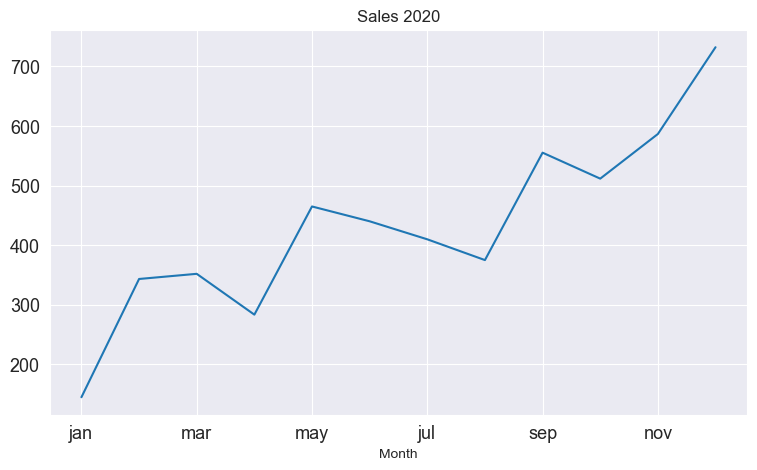

In [3]:
# Line plot, include a title
salesdata["2020"].plot(title="Sales 2020", figsize=(9,5), fontsize=13);

We could customise the appearance of this line plot - e.g. add markers, change the line colour and style:

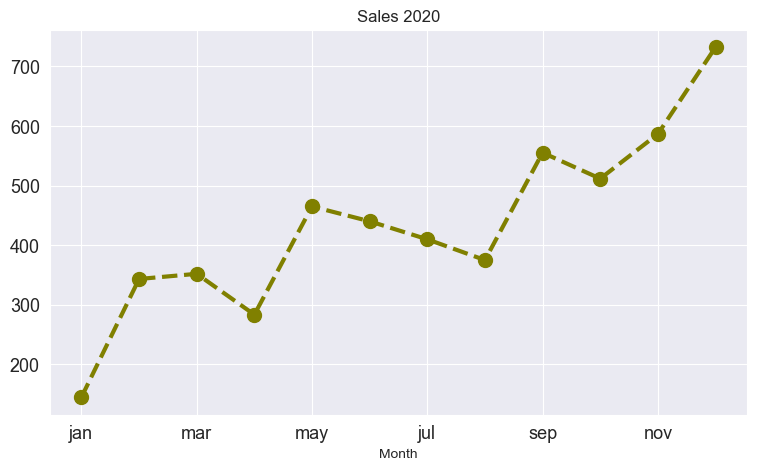

In [4]:
salesdata["2020"].plot(title="Sales 2020", 
                           figsize=(9,5), fontsize=13,
                           marker='o', markersize=10,
                           color='olive', linewidth=3, linestyle='dashed');

We can also plot all years (columns) as lines on the same chart by calling the *plot()* function on the DataFrame. A legend will be automatically included.

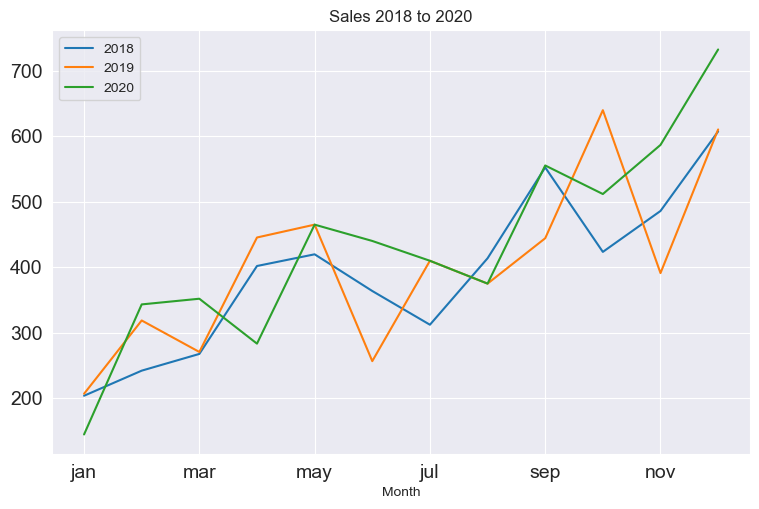

In [5]:
salesdata.plot(title="Sales 2018 to 2020", figsize=(9,5.5), fontsize=14);

Once we have created a plot, we can apply standard Matplotlib methods to customise a plot further. Note this needs to be done in the same Notebook cell.

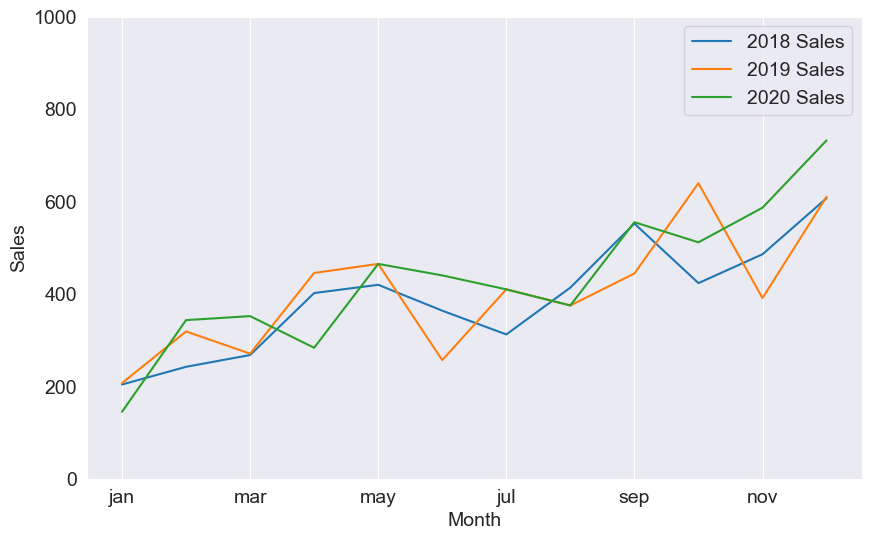

In [6]:
ax = salesdata.plot(figsize=(10,6), fontsize=14)
plt.ylim(0,1000)
plt.grid(axis="y")
plt.legend(["2018 Sales","2019 Sales","2020 Sales"], fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14);

We can display each series on a separate subplot (i.e. **small multiples**) by setting *subplots=True*. We ensure that the y-axes all have the same range using *sharey=True*, so that we can easily make visual comparisons.

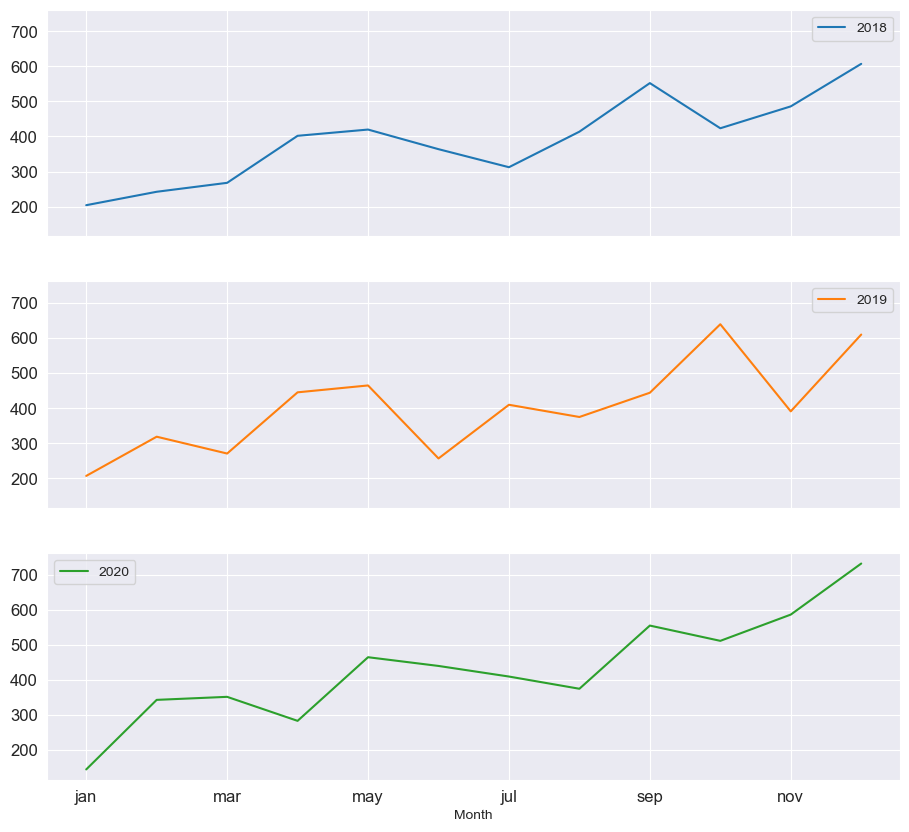

In [7]:
salesdata.plot(subplots=True,figsize=(11, 10), sharey=True, fontsize=12);

## Bar Plots

Create a sample DataFrame with results for 4 assignments submitted by 6 students:

In [8]:
scores = {'first_name': ['John', 'Molly', 'Amy', 'Mary', 'Paul', 'Alice'],
        'assignment1': [15, 10, 23, 16, 9, 11],
        'assignment2': [21, 13, 25, 18, 19, 13],
        'assignment3': [23, 16, 17, 19, 17, 22],
        'assignment4': [18, 18, 19, 19, 18, 20], }
df = pd.DataFrame(scores, columns = ['first_name', 'assignment1', 'assignment2', 'assignment3','assignment4'])
df = df.set_index("first_name")
df

,assignment1,assignment2,assignment3,assignment4
first_name,,,,
John,15,21,23,18
Molly,10,13,16,18
Amy,23,25,17,19
Mary,16,18,19,19
Paul,9,19,17,18
Alice,11,13,22,20


Create a simple vertical bar chart for a single assignment:

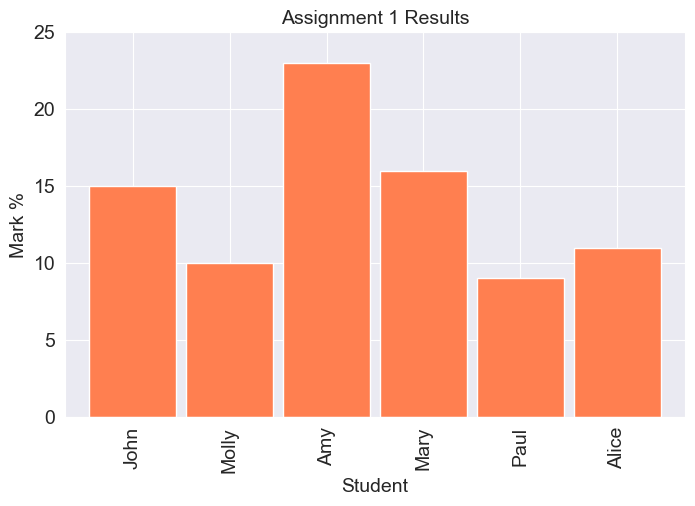

In [9]:
ax = df["assignment1"].plot(kind="bar", figsize=(8, 5), fontsize=14, color="coral", width=0.9)
# customize the axes and title
ax.set_ylim((0,25))
ax.set_xlabel("Student", fontsize=14)
ax.set_ylabel("Mark %", fontsize=14)
ax.set_title("Assignment 1 Results", fontsize=14);

This could also be displayed as a horizontal bar chart:

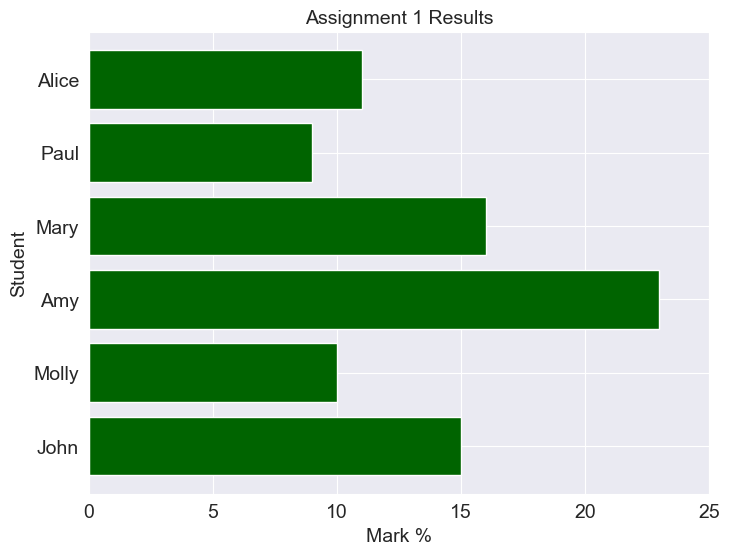

In [10]:
ax = df["assignment1"].plot(kind="barh", figsize=(8, 6), fontsize=14, color="darkgreen", width=0.8)
# customize the axes and title
ax.set_xlim((0,25))
ax.set_xlabel("Mark %", fontsize=14)
ax.set_ylabel("Student", fontsize=14)
ax.set_title("Assignment 1 Results", fontsize=14);

We can also generate bar charts for all assignments (i.e. all columns in the DataFrame):

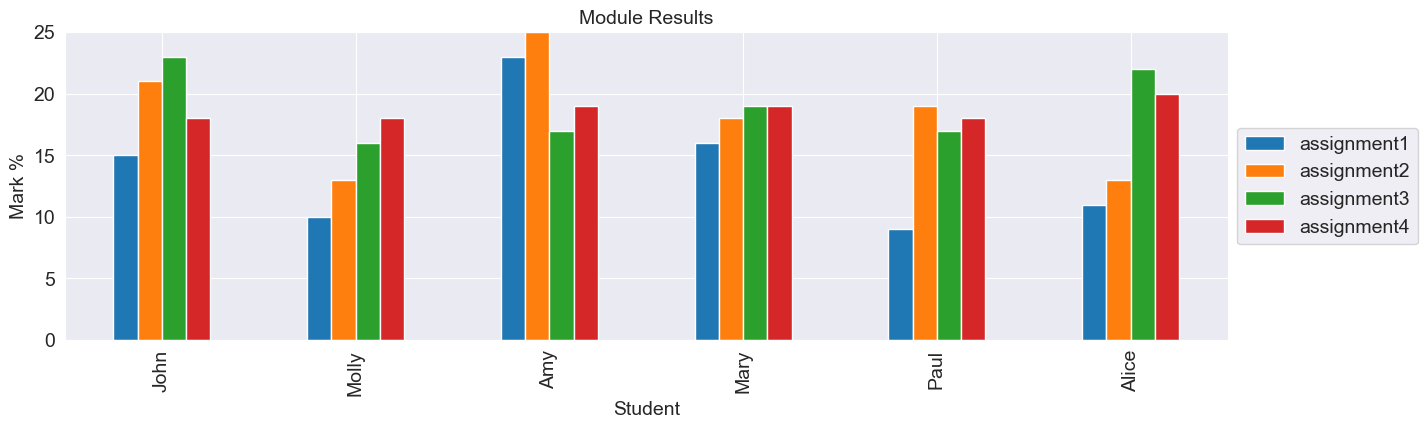

In [11]:
ax = df.plot.bar(figsize=(15, 4), fontsize=14)
# customize the axes and title
ax.set_ylim((0,25))
ax.set_xlabel("Student", fontsize=14)
ax.set_ylabel("Mark %", fontsize=14)
ax.set_title("Module Results", fontsize=14)
# move the legend to outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

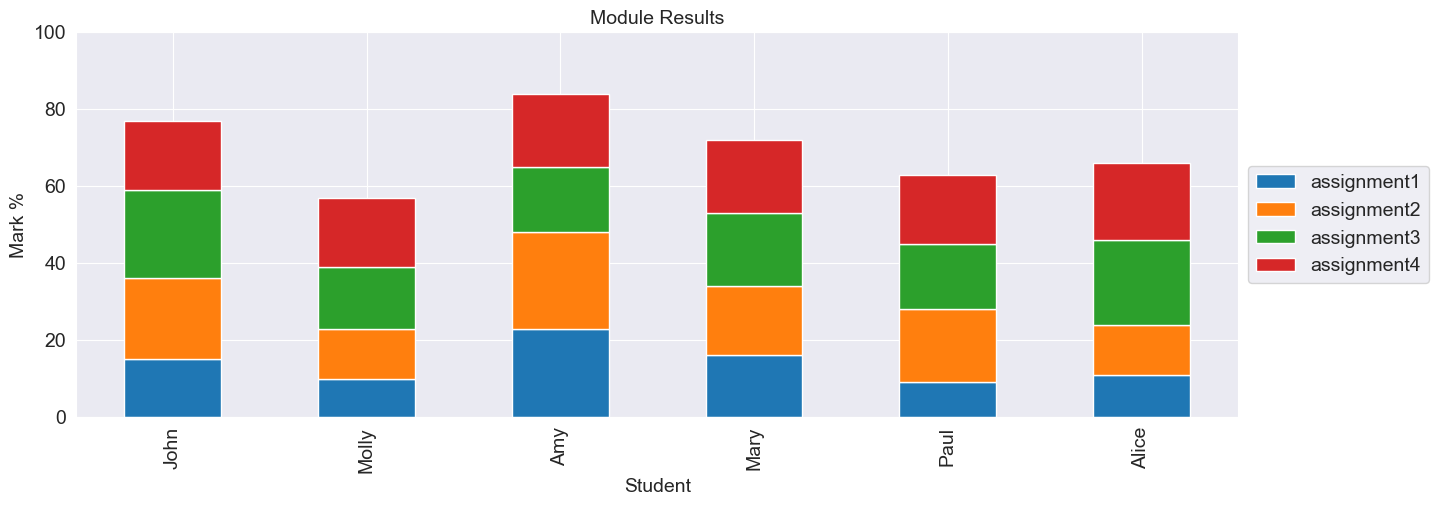

In [12]:
ax = df.plot.bar(stacked=True, figsize=(15, 5), fontsize=14)
# customize the axes and title
ax.set_ylim((0,100))
ax.set_xlabel("Student", fontsize=14)
ax.set_ylabel("Mark %", fontsize=14)
ax.set_title("Module Results", fontsize=14)
# move the legend to outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

Alternatively, instead of nesting the bars, we can display them as separate subplots:

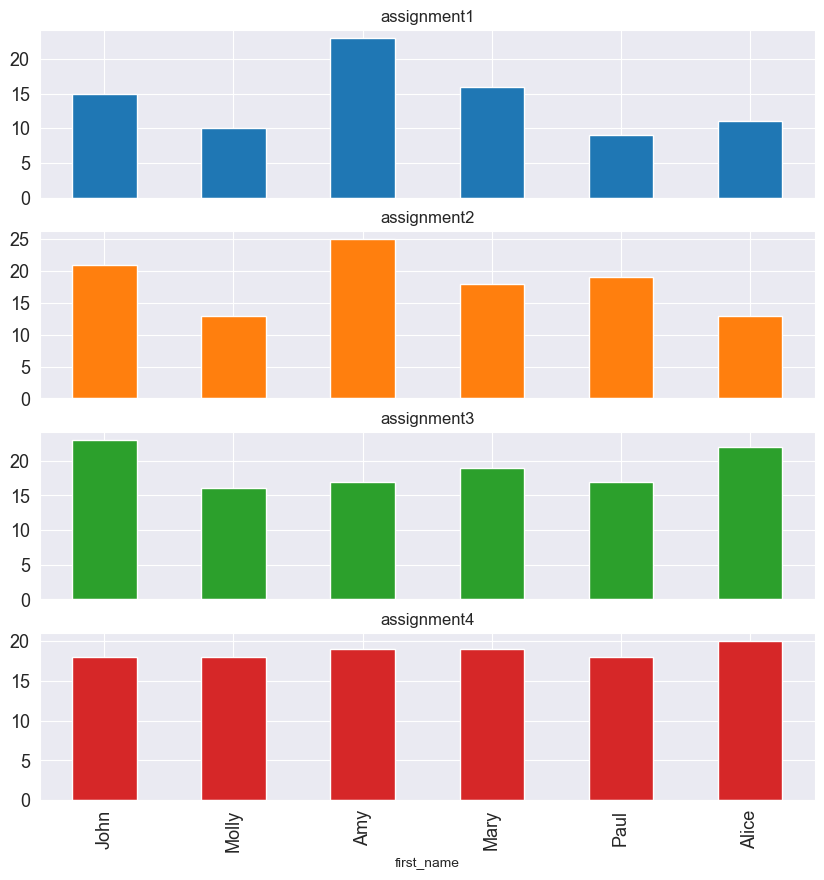

In [13]:
df.plot.bar(figsize=(10, 10), subplots=True, legend=None, fontsize=13);

## Plotting Examples - Penguins Dataset

Here we look at the *penguins* dataset, which is described here:

https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris

In this dataset, each row represents a set of features describing a penguin, which is categorised by species. We can look at how many penguins are categorised into each species.

In [14]:
data_penguins = pd.read_csv("penguins_af.csv")
data_penguins.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
5,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
6,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
7,12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
8,13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
9,14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007


In [15]:
species_counts = data_penguins["species"].value_counts()
species_counts

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

The first way we can plot things is using the *plot()* function from Pandas DataFrames, which uses Matplotlib underneath. We could show the distribution of species visually as a *bar chart*:

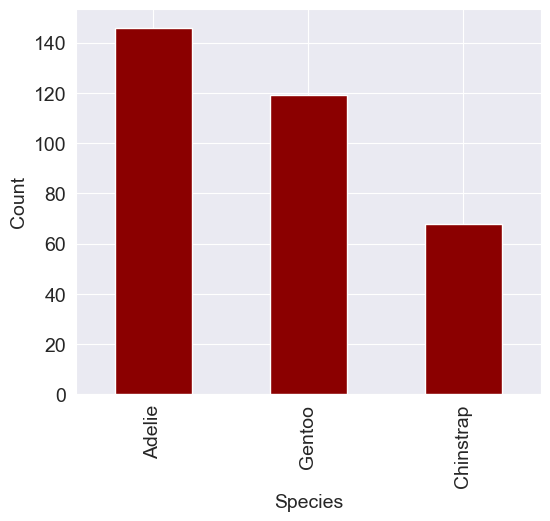

In [16]:
ax = species_counts.plot(kind="bar", fontsize=14, figsize=(6,5), color="darkred", zorder=3)
# add labels to the axes
plt.xlabel("Species", fontsize=14)
plt.ylabel("Count", fontsize=14)
# add horizontal grid lines
ax.yaxis.grid(True);

We could also represent the information above using a *pie chart*:

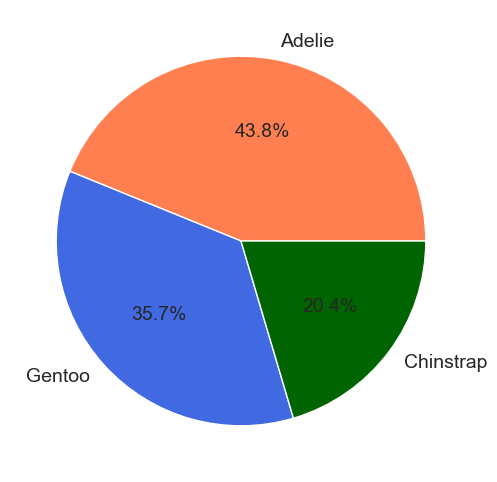

In [17]:
ax = species_counts.plot(kind="pie", figsize=(6, 6), fontsize=14, autopct="%.1f%%", 
                        colors=["coral", "royalblue", "darkgreen"])
ax.set_ylabel(None);

To inspect the relationships between values for different features, we can create a 2D scatterplot of pairs of features in the dataset.

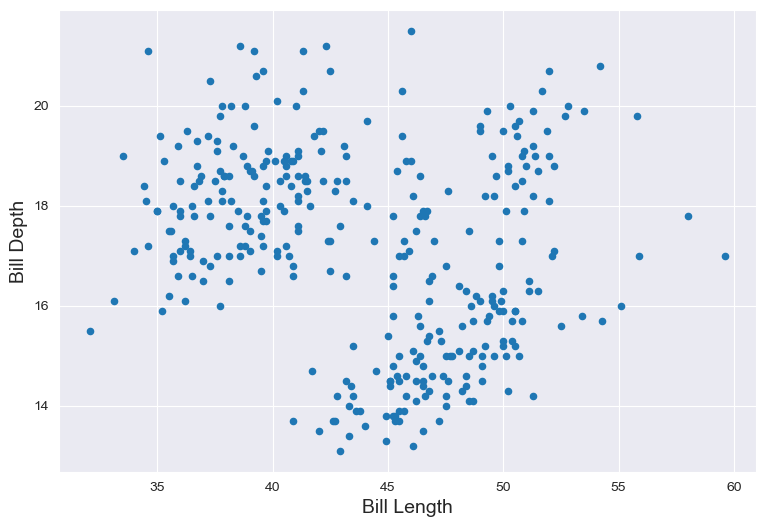

In [18]:
ax = data_penguins.plot(kind="scatter", x="bill_length_mm", y="bill_depth_mm", figsize=(9,6))
# add axis labels
plt.xlabel('Bill Length', fontsize=14)
plt.ylabel('Bill Depth', fontsize=14);

We customise further aspects of the appearance of the plot, such as the shape and colour of the points:

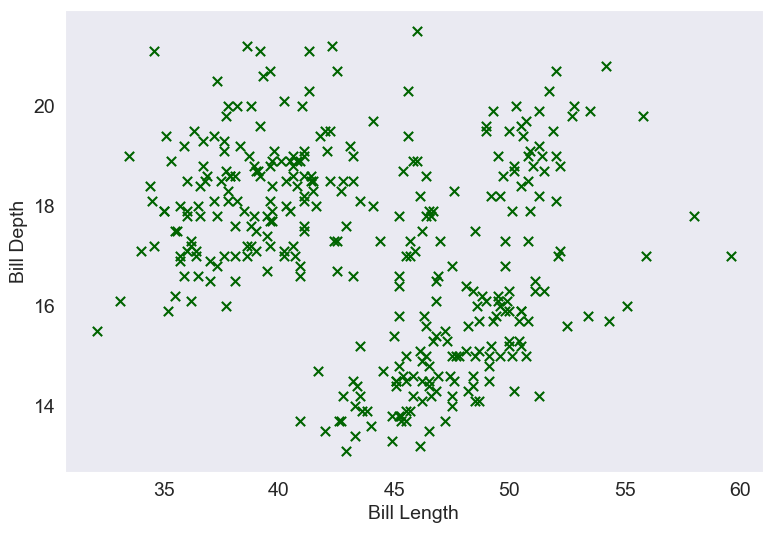

In [19]:
# note the zorder parameter puts the bars in front of the grid
ax = data_penguins.plot(kind="scatter", x="bill_length_mm", y="bill_depth_mm", figsize=(9,6), fontsize=14,
          marker='x', color='darkgreen', s=45, zorder=3)
# add axis labels
plt.xlabel('Bill Length', fontsize=14)
plt.ylabel('Bill Depth', fontsize=14)
# add horizontal and vertical grid
plt.grid();

To get a view of the distribution of values for a given feature, we can plot a *histogram* with the specified number of "bins":

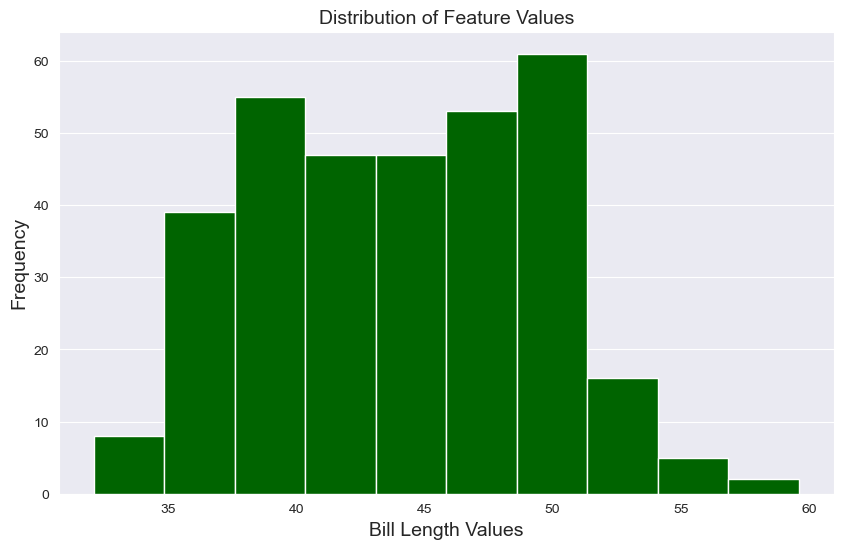

In [20]:
# plot the relevant column as a histogram
ax = data_penguins["bill_length_mm"].hist(bins=10, figsize=(10,6), color="darkgreen", zorder=3)
plt.grid(axis="x")
plt.title("Distribution of Feature Values", fontsize=14)
plt.xlabel('Bill Length Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

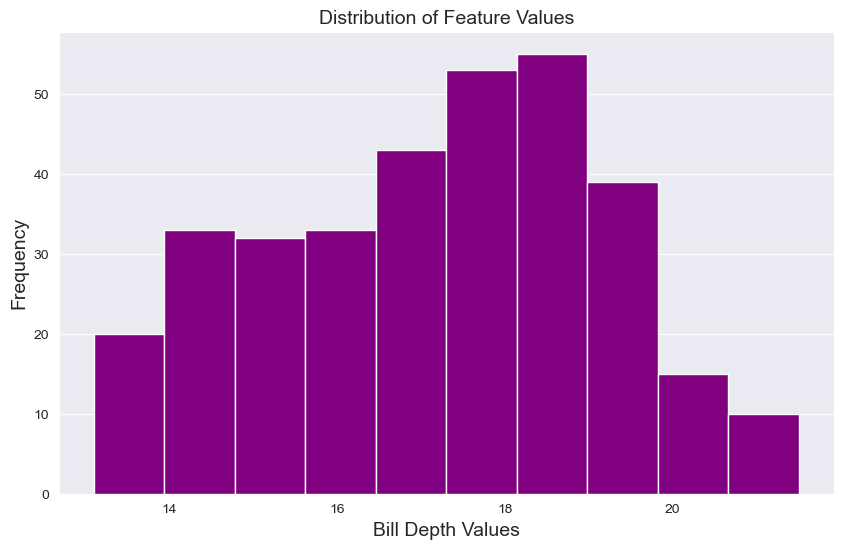

In [21]:
# plot the relevant column as a histogram
ax = data_penguins["bill_depth_mm"].hist(bins=10, figsize=(10,6), color="purple", zorder=3)
plt.grid(axis="x")
plt.title("Distribution of Feature Values", fontsize=14)
plt.xlabel('Bill Depth Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

To get an overview of all the dataset, showing the relationship between pairs of features and all feature histograms, we can create a *scatter matrix*.

We will do this for a subset of numeric features.

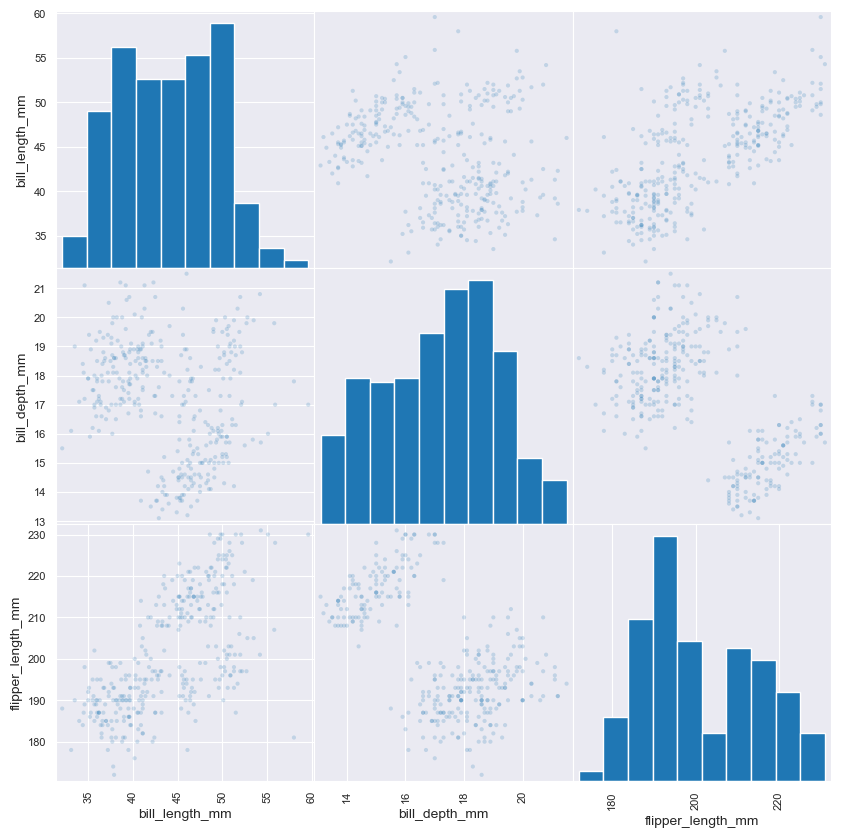

In [22]:
from pandas.plotting import scatter_matrix
# get a subset of the features
data_subset = data_penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]
# plot the scatter matrix for the subset of features
scatter_matrix(data_subset, alpha=0.2, figsize=(10, 10));

Another visualization technique provided by Pandas is *parallel coordinates*. This involves plotting each feature on a separate column and then draws lines connecting the features for each data sample. In the example below, the lines are coloured based on each penguin's species values.

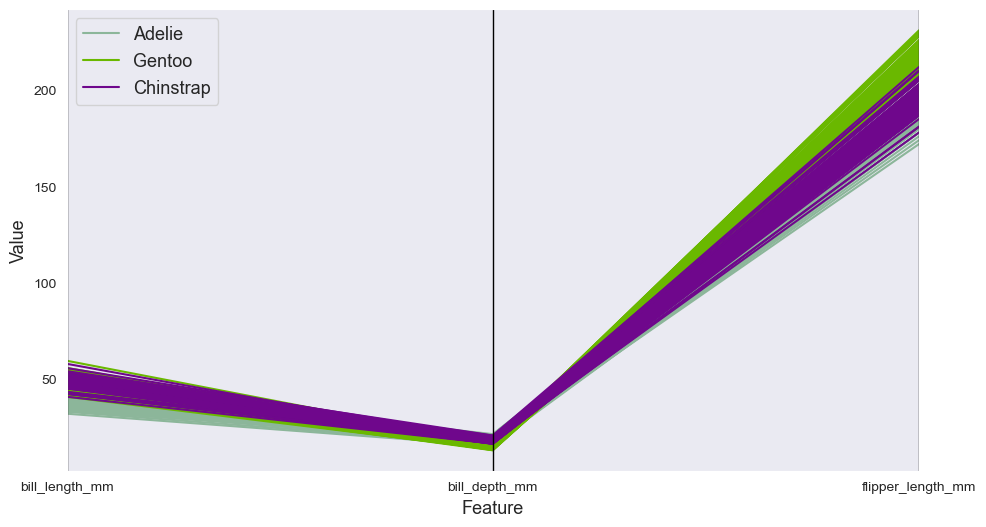

In [23]:
from pandas.plotting import parallel_coordinates
# get a subset of the features, this time including species
data_subset2 = data_penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "species"]]
# produce the plot
plt.figure(figsize=(11, 6))
ax = parallel_coordinates(data_subset2, "species");
# add axis labels
plt.xlabel('Feature', fontsize=13)
plt.ylabel('Value', fontsize=13)
# move the legend
ax.legend(loc='upper left', fontsize=13);

We can export the final plot as a PNG file by accessing the underlying Matplotlib figure:

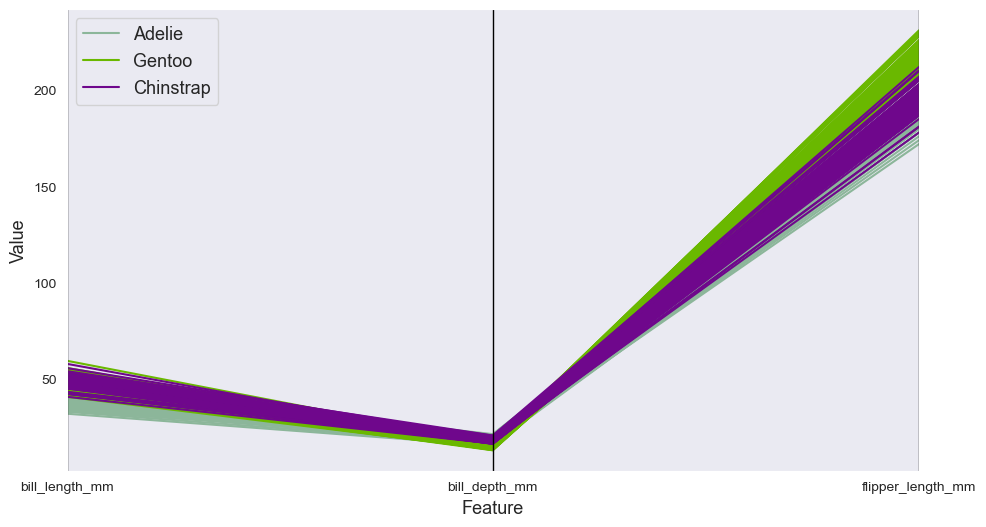

In [24]:
# produce the plot
plt.figure(figsize=(11, 6))
ax = parallel_coordinates(data_subset2, "species");
# add axis labels
plt.xlabel('Feature', fontsize=13)
plt.ylabel('Value', fontsize=13)
# move the legend
ax.legend(loc='upper left', fontsize=13);
# save the figure
fig = ax.get_figure()
# note we specify the background colour of the exported image to be white
fig.savefig("penguins-plot.png", facecolor="white")